In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn
print(sklearn.__version__)

1.5.0


In [4]:
import numpy as np
from numpy import expand_dims
import pandas as pd
import json
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
with open('ship-dataset/shipsnet.json') as data_file:
    dataset = json.load(data_file)
shipsnet= pd.DataFrame(dataset)
shipsnet.head(1000)

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007
...,...,...,...,...
995,"[103, 95, 99, 108, 110, 125, 131, 125, 133, 13...",1,"[-122.34862085843947, 37.767167357603554]",20170921_181406_1031
996,"[75, 75, 75, 75, 74, 70, 69, 72, 73, 72, 70, 6...",1,"[-122.33786604607423, 37.73944613318674]",20170604_180820_0f52
997,"[75, 74, 75, 75, 74, 74, 75, 76, 76, 75, 75, 7...",1,"[-122.33284969739871, 37.71792145705744]",20170721_180825_100b
998,"[49, 50, 49, 45, 49, 53, 52, 46, 43, 44, 49, 5...",1,"[-122.35668820008198, 37.75991104734941]",20170618_180801_0f34


In [7]:
print(len(shipsnet['data'][0]))

19200


In [8]:
shipsnet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       4000 non-null   object
 1   labels     4000 non-null   int64 
 2   locations  4000 non-null   object
 3   scene_ids  4000 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


In [9]:
shipsnet = shipsnet[["data","labels"]]
shipsnet.head()

,data,labels
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1


In [10]:
ship_images = shipsnet["labels"].value_counts()[0]
no_ship_images = shipsnet["labels"].value_counts()[1]
print("Number of the ship_images :{}".format(ship_images),"\n")
print("Number of the NON-ship_images :{}".format(no_ship_images))

Number of the ship_images :3000 

Number of the NON-ship_images :1000


In [11]:
# Turning the json information into numpy array and then assign it as x and y variables
x = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

In [12]:
x.shape

(4000, 19200)

In [13]:
x

array([[ 82,  89,  91, ...,  86,  88,  89],
       [ 76,  75,  67, ...,  54,  57,  58],
       [125, 127, 129, ..., 111, 109, 115],
       ...,
       [171, 135, 118, ...,  95,  95,  85],
       [ 85,  90,  94, ...,  96,  95,  89],
       [122, 122, 126, ...,  51,  46,  69]], dtype=uint8)

In [14]:
x_reshaped = x.reshape([-1, 3, 80, 80])

In [15]:
x_reshaped

array([[[[ 82,  89,  91, ...,  89,  84,  83],
         [ 89,  91,  89, ..., 101,  87,  87],
         [ 91,  93,  86, ...,  83,  90,  92],
         ...,
         [ 89,  88,  92, ...,  88,  85,  89],
         [ 87,  88,  91, ...,  91,  90,  90],
         [ 88,  91,  90, ...,  88,  89,  90]],

        [[ 94,  99, 101, ..., 102,  96,  96],
         [100, 102, 101, ..., 115, 100,  99],
         [101, 104,  98, ...,  96, 102, 102],
         ...,
         [ 98,  98, 102, ...,  99,  97, 100],
         [ 99,  99, 101, ..., 101, 101, 102],
         [ 99, 101, 101, ..., 101, 102, 102]],

        [[ 80,  86,  89, ...,  86,  81,  84],
         [ 86,  88,  89, ...,  97,  84,  86],
         [ 88,  92,  85, ...,  81,  88,  89],
         ...,
         [ 87,  86,  89, ...,  86,  84,  87],
         [ 87,  86,  88, ...,  88,  88,  89],
         [ 85,  87,  87, ...,  86,  88,  89]]],


       [[[ 76,  75,  67, ...,  78,  77,  80],
         [ 71,  73,  72, ...,  79,  77,  81],
         [ 73,  70,  67, ..., 

In [16]:
x_reshaped[0].shape

(3, 80, 80)

In [17]:
print(x_reshaped[0][0])

[[ 82  89  91 ...  89  84  83]
 [ 89  91  89 ... 101  87  87]
 [ 91  93  86 ...  83  90  92]
 ...
 [ 89  88  92 ...  88  85  89]
 [ 87  88  91 ...  91  90  90]
 [ 88  91  90 ...  88  89  90]]


In [18]:
x_reshaped[0][0].shape

(80, 80)

In [19]:
print(x_reshaped[0][1])

[[ 94  99 101 ... 102  96  96]
 [100 102 101 ... 115 100  99]
 [101 104  98 ...  96 102 102]
 ...
 [ 98  98 102 ...  99  97 100]
 [ 99  99 101 ... 101 101 102]
 [ 99 101 101 ... 101 102 102]]


In [20]:
print(x_reshaped[0])

[[[ 82  89  91 ...  89  84  83]
  [ 89  91  89 ... 101  87  87]
  [ 91  93  86 ...  83  90  92]
  ...
  [ 89  88  92 ...  88  85  89]
  [ 87  88  91 ...  91  90  90]
  [ 88  91  90 ...  88  89  90]]

 [[ 94  99 101 ... 102  96  96]
  [100 102 101 ... 115 100  99]
  [101 104  98 ...  96 102 102]
  ...
  [ 98  98 102 ...  99  97 100]
  [ 99  99 101 ... 101 101 102]
  [ 99 101 101 ... 101 102 102]]

 [[ 80  86  89 ...  86  81  84]
  [ 86  88  89 ...  97  84  86]
  [ 88  92  85 ...  81  88  89]
  ...
  [ 87  86  89 ...  86  84  87]
  [ 87  86  88 ...  88  88  89]
  [ 85  87  87 ...  86  88  89]]]


In [21]:
x_reshaped[0][0].shape

(80, 80)

In [22]:
x_reshaped = x.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])
x_reshaped.shape

(4000, 80, 80, 3)

In [23]:
print(x_reshaped[0][79])

[[ 88  99  85]
 [ 91 101  87]
 [ 90 101  87]
 [ 88 100  87]
 [ 89  99  88]
 [ 89  99  88]
 [ 86  96  84]
 [ 92 101  89]
 [ 90 100  87]
 [ 87  97  84]
 [ 86  98  84]
 [ 90 102  87]
 [ 89 100  85]
 [ 90 100  86]
 [ 89 100  86]
 [ 87  99  86]
 [ 86  99  85]
 [ 90 102  88]
 [ 90 100  86]
 [ 92 102  89]
 [ 89 100  87]
 [ 89 100  87]
 [ 89 100  88]
 [ 86  97  84]
 [ 84  95  82]
 [ 85  97  85]
 [ 90 100  90]
 [ 90 100  91]
 [ 87  98  88]
 [ 90 100  89]
 [ 86  97  86]
 [ 88  98  87]
 [ 90 101  89]
 [ 88 100  87]
 [ 85  98  85]
 [ 86 100  86]
 [ 86  99  86]
 [ 90 101  88]
 [ 91 101  89]
 [ 90  99  87]
 [ 89  97  86]
 [ 91 100  89]
 [ 90  99  88]
 [ 90 100  89]
 [ 89 100  88]
 [ 89  99  86]
 [ 92 101  87]
 [ 96 104  93]
 [ 91 100  88]
 [ 91 101  89]
 [ 89 101  87]
 [ 86  99  85]
 [ 88  99  87]
 [ 94 103  92]
 [ 93 101  90]
 [ 87  95  83]
 [ 85  95  82]
 [ 93 103  88]
 [ 99 108  93]
 [ 91 101  89]
 [ 90 101  91]
 [ 89 100  91]
 [ 89 100  90]
 [ 92 103  92]
 [ 92 103  94]
 [ 94 103  92]
 [ 91 100 

In [24]:
x_reshaped[0][4].shape

(80, 3)

In [25]:
y.shape

(4000,)

In [26]:
y_reshaped = to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

In [27]:
y_reshaped

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

## Exploring the images

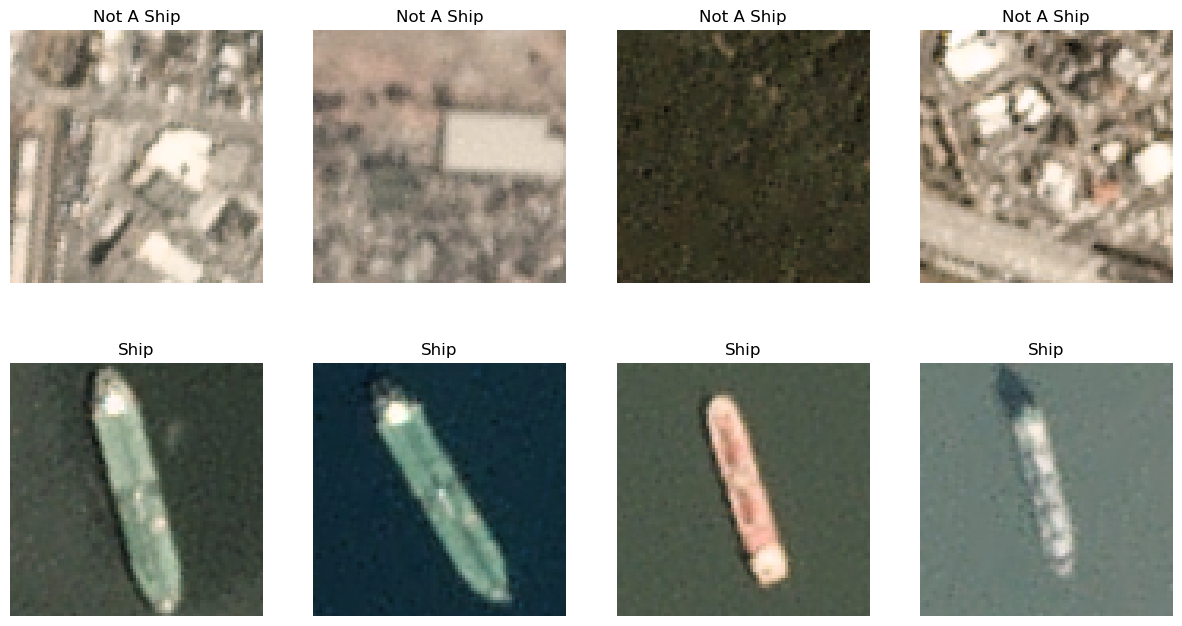

In [28]:
image_no_ship = x_reshaped[y==0]
image_ship = x_reshaped[y==1]

def plot(a,b):
    
    plt.figure(figsize=(15, 15))
    for i, k in enumerate(range(1,9)):
        if i < 4:
            plt.subplot(2,4,k)
            plt.title('Not A Ship')
            plt.imshow(image_no_ship[i+5])
            plt.axis("off")
        else:
            plt.subplot(2,4,k)
            plt.title('Ship')
            plt.imshow(image_ship[i+15])
            plt.axis("off")
            
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)

#Implementation of the function 

plot(image_no_ship, image_ship)

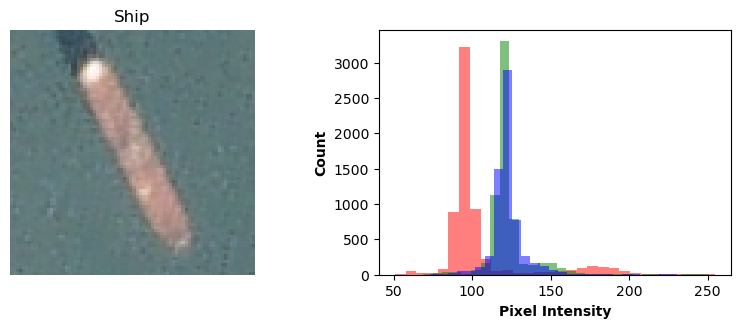

Minimum pixel value of this image: 51
Maximum pixel value of this image: 255


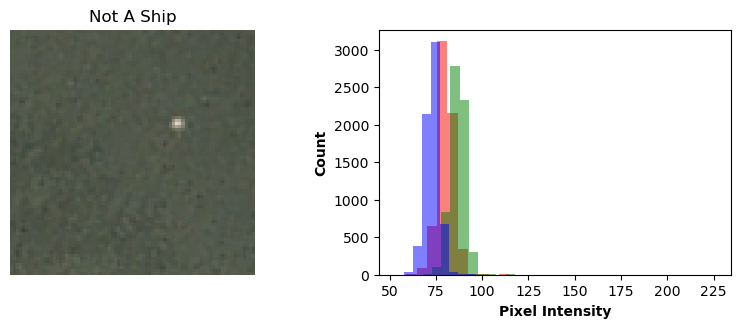

Minimum pixel value of this image: 53
Maximum pixel value of this image: 226


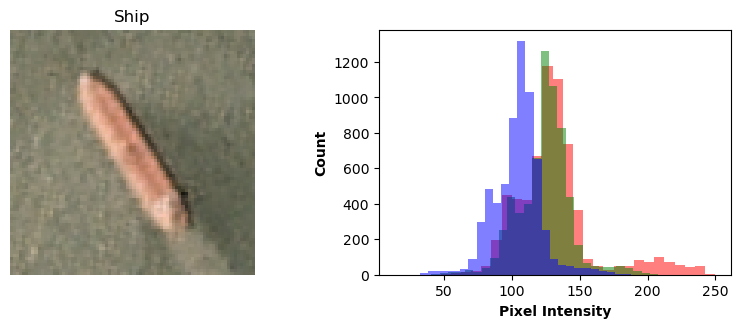

Minimum pixel value of this image: 14
Maximum pixel value of this image: 250


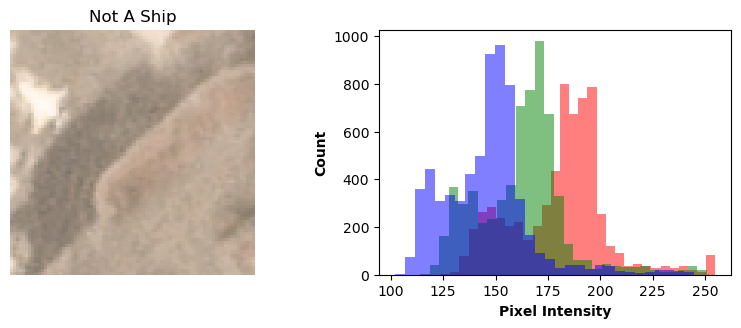

Minimum pixel value of this image: 102
Maximum pixel value of this image: 255


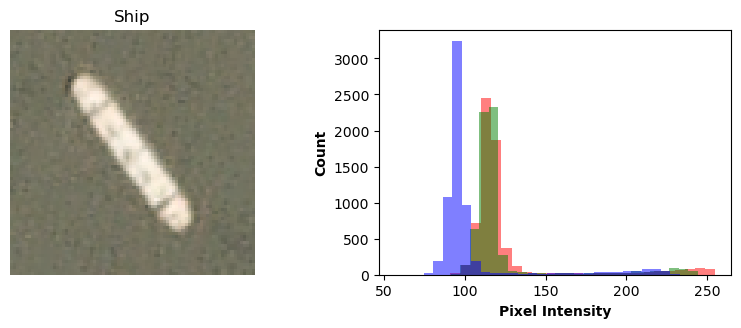

Minimum pixel value of this image: 57
Maximum pixel value of this image: 255


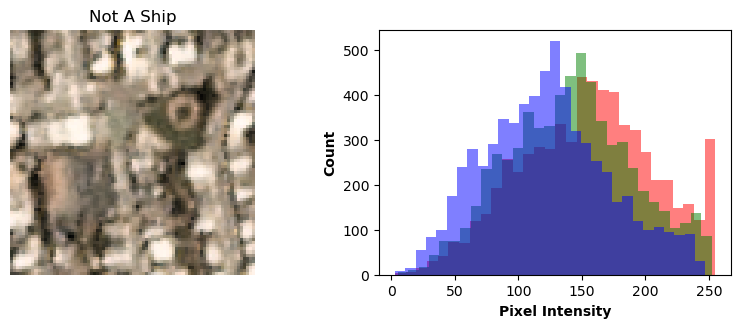

Minimum pixel value of this image: 3
Maximum pixel value of this image: 255


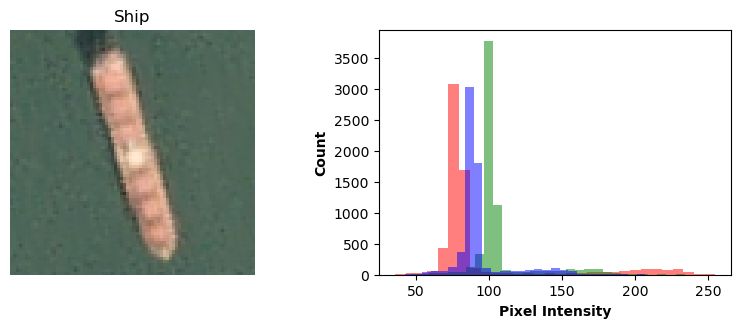

Minimum pixel value of this image: 36
Maximum pixel value of this image: 255


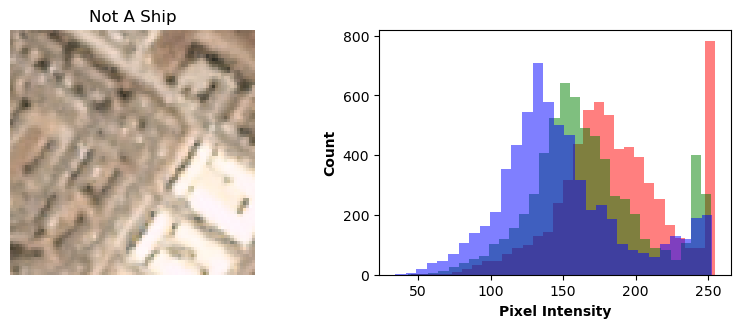

Minimum pixel value of this image: 34
Maximum pixel value of this image: 255


In [29]:
def plotHistogram(ship, not_ship):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(ship)
    plt.axis('off')
    plt.title('Ship')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(ship[:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(ship[:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(ship[:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()
    print("Minimum pixel value of this image: {}".format(ship.min()))
    print("Maximum pixel value of this image: {}".format(ship.max()))
    plt.figure(figsize = (10,7))
    plt.subplot(2,2,3)
    plt.imshow(not_ship)
    plt.axis('off')
    plt.title('Not A Ship')
    histo = plt.subplot(2,2,4)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(not_ship[:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(not_ship[:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(not_ship[:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()
    print("Minimum pixel value of this image: {}".format(not_ship.min()))
    print("Maximum pixel value of this image: {}".format(not_ship.max()))
#Implementation of the function

for i in range (10,14):
    plotHistogram(x_reshaped[y==1][i], x_reshaped[y==0][i])

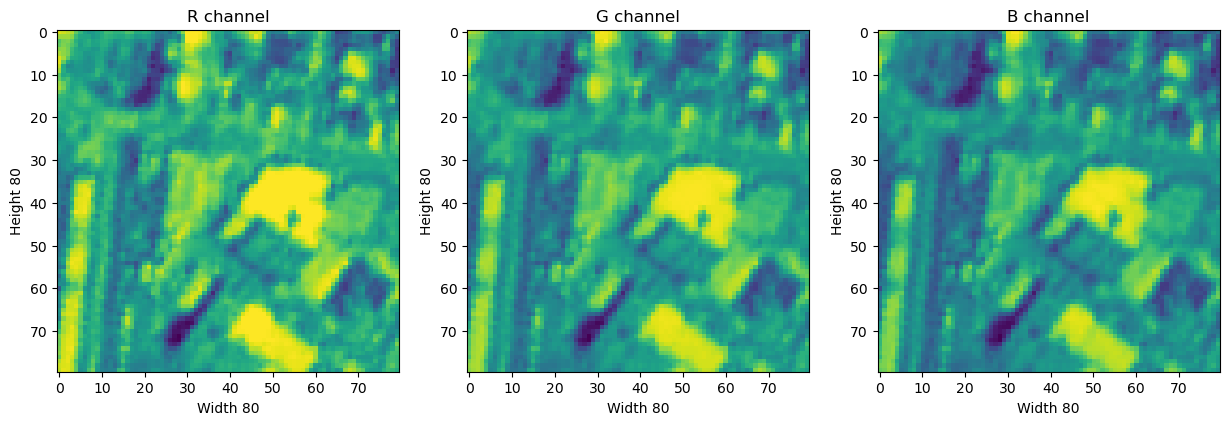

In [30]:
my_list = [(0, 'R channel'), (1, 'G channel'), (2, 'B channel')]

plt.figure(figsize = (15,15))

for i, k in my_list:
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.ylabel('Height {}'.format(x_reshaped[y==0][5].shape[0]))
    plt.xlabel('Width {}'.format(x_reshaped[y==0][5].shape[1]))
    plt.imshow(x_reshaped[y==0][5][ : , : , i])

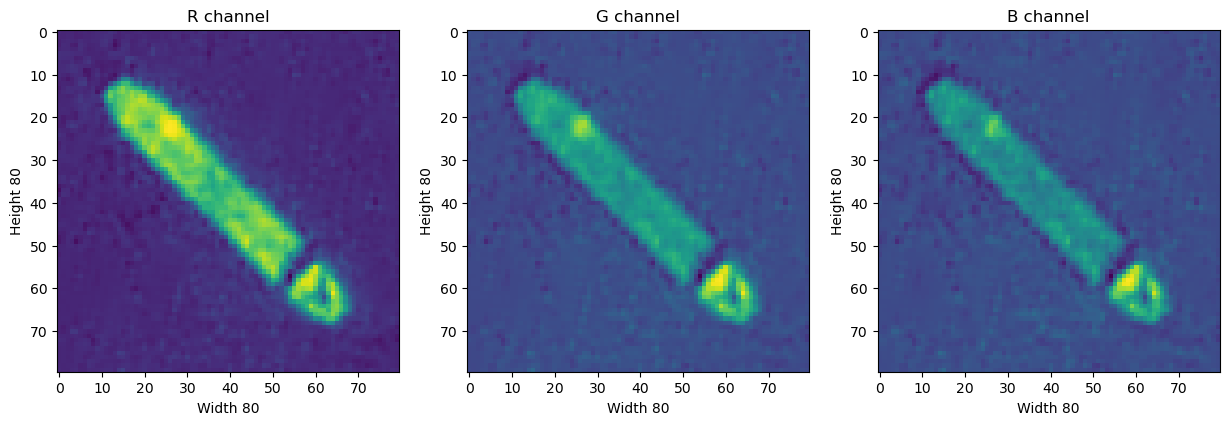

In [31]:
my_list = [(0, 'R channel'), (1, 'G channel'), (2, 'B channel')]

plt.figure(figsize = (15,15))

for i, k in my_list:
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.ylabel('Height {}'.format(x_reshaped[y==0][5].shape[0]))
    plt.xlabel('Width {}'.format(x_reshaped[y==0][5].shape[1]))
    plt.imshow(x_reshaped[y==1][5][ : , : , i])

## Modelling

In [32]:
x_reshaped = x_reshaped / 255

In [33]:
x_reshaped[0][0][0] # Normalized RGB values of the firs pixel of the first image in the dataset.

array([0.32156863, 0.36862745, 0.31372549])

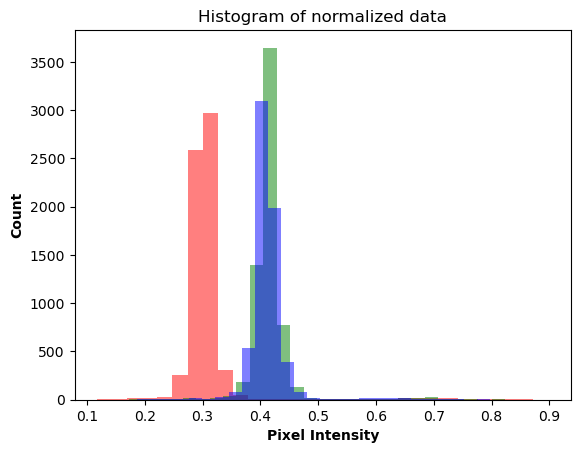

In [34]:
n_bins = 30
plt.hist(x_reshaped[y == 0][0][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
plt.hist(x_reshaped[y == 0][0][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
plt.ylabel('Count', fontweight = "bold")
plt.xlabel('Pixel Intensity', fontweight = "bold")
plt.title("Histogram of normalized data")
plt.show()

In [35]:
x_train_1, x_test, y_train_1, y_test = train_test_split(x_reshaped, y_reshaped,
                                                        test_size = 0.20, random_state = 42)


x_train, x_val, y_train, y_val = train_test_split(x_train_1, y_train_1, 
                                                  test_size = 0.25, random_state = 42)


print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)
print("y_train shape",x_val.shape)
print("y_test shape",y_val.shape)
print("x_train_1 shape",x_train_1.shape)
print("x_val shape",x_val.shape)
print("y_train_1 shape",y_train_1.shape)



x_train shape (2400, 80, 80, 3)
x_test shape (800, 80, 80, 3)
y_train shape (2400, 2)
y_test shape (800, 2)
y_train shape (800, 80, 80, 3)
y_test shape (800, 2)
x_train_1 shape (3200, 80, 80, 3)
x_val shape (800, 80, 80, 3)
y_train_1 shape (3200, 2)


In [36]:
x_test.shape

(800, 80, 80, 3)

In [37]:
x_train.shape

(2400, 80, 80, 3)

## ANN 

In [38]:
from keras import callbacks
model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

history = model.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), callbacks = [earlystopping])

C:\Users\vasan\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.6568 - loss: 2.2353 - val_accuracy: 0.8438 - val_loss: 0.3646
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8623 - loss: 0.3632 - val_accuracy: 0.8213 - val_loss: 0.5199
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8483 - loss: 0.3807 - val_accuracy: 0.8300 - val_loss: 0.4951
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8331 - loss: 0.4621 - val_accuracy: 0.8825 - val_loss: 0.2779
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8801 - loss: 0.3011 - val_accuracy: 0.8875 - val_loss: 0.2981
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8464 - loss: 0.4196 - val_accuracy: 0.9000 - val_loss: 0.2523
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8917 - loss: 0.2505 - val_accuracy: 0.8213 - val_loss: 0.5846
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.8554 - loss: 0.3887 - val_accuracy: 0.

In [39]:
model.evaluate(x_test, y_test)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9092 - loss: 0.2189


[0.23239590227603912, 0.9112499952316284]

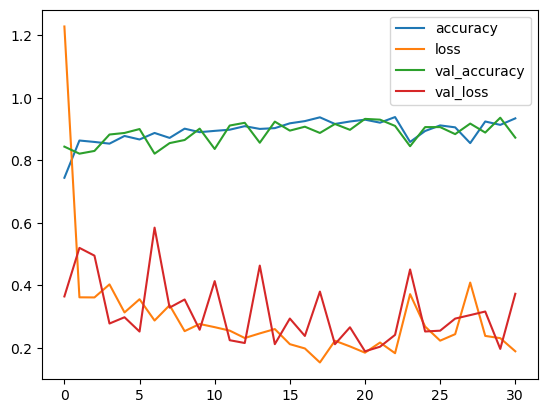

In [40]:
pd.DataFrame(history.history).plot();

In [41]:
from keras import callbacks
model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

history = model.fit(x_train, y_train, epochs = 100, validation_data=(x_val, y_val), callbacks = [earlystopping])

C:\Users\vasan\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.7105 - loss: 0.8308 - val_accuracy: 0.8512 - val_loss: 0.4110
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8541 - loss: 0.3668 - val_accuracy: 0.7812 - val_loss: 0.5458
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8434 - loss: 0.3981 - val_accuracy: 0.8425 - val_loss: 0.4214
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8606 - loss: 0.3489 - val_accuracy: 0.8975 - val_loss: 0.2750
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8660 - loss: 0.3056 - val_accuracy: 0.7850 - val_loss: 0.5643
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8604 - loss: 0.3438 - val_accuracy: 0.8675 - val_loss: 0.2788
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.8800 - loss: 0.2859 - val_accuracy: 0.8537 - val_loss: 0.3885
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.8900 - loss: 0.2709 - val_accuracy: 0

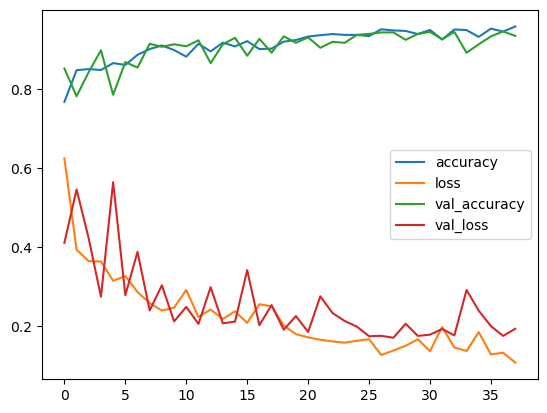

In [42]:
pd.DataFrame(history.history).plot();

In [43]:
prediction = model.predict(x_test)
pd.Series(prediction[0], index=["Not A Ship", "Ship"])

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Not A Ship    0.104654
Ship          0.895346
dtype: float32

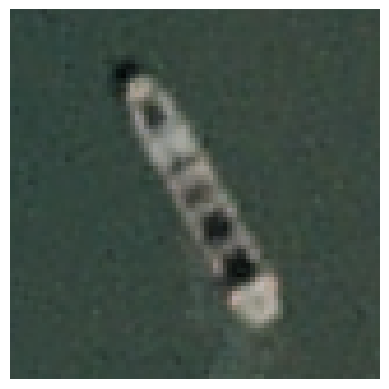

In [44]:
plt.imshow(x_test[0])
plt.axis("off")
plt.show()

In [45]:
predicted_data = pd.DataFrame(prediction, columns=["Not A Ship", "Ship"])
predicted_data.head(3)

,Not A Ship,Ship
0,0.104654,0.895346
1,0.999485,0.000515
2,0.011931,0.988069


In [46]:
y_test_data = pd.DataFrame(y_test, columns=["Not A Ship", "Ship"])
y_test_data.head(3)

,Not A Ship,Ship
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0


In [47]:
predicted_data['There is a Ship'] = y_test[:, 1]
predicted_data.head()

,Not A Ship,Ship,There is a Ship
0,0.104654,0.895346,1.0
1,0.999485,0.000515,0.0
2,0.011931,0.988069,1.0
3,0.031916,0.968084,0.0
4,0.999833,0.000167,0.0


In [48]:
predicted_data["Difference"] = predicted_data["Ship"] - predicted_data["There is a Ship"]
predicted_data

,Not A Ship,Ship,There is a Ship,Difference
0,0.104654,0.895346,1.0,-0.104654
1,0.999485,0.000515,0.0,0.000515
2,0.011931,0.988069,1.0,-0.011931
3,0.031916,0.968084,0.0,0.968084
4,0.999833,0.000167,0.0,0.000167
...,...,...,...,...
795,0.299213,0.700787,0.0,0.700787
796,0.341534,0.658466,1.0,-0.341534
797,0.876768,0.123232,0.0,0.123232
798,0.999184,0.000816,0.0,0.000816


In [49]:
predicted_data.sort_values('Difference', ascending=False).head(10)

,Not A Ship,Ship,There is a Ship,Difference
528,0.001922,0.998078,0.0,0.998078
662,0.021263,0.978737,0.0,0.978737
3,0.031916,0.968084,0.0,0.968084
201,0.061315,0.938685,0.0,0.938685
783,0.075661,0.924339,0.0,0.924339
441,0.088455,0.911545,0.0,0.911545
14,0.089541,0.910459,0.0,0.910459
628,0.089966,0.910034,0.0,0.910034
717,0.126149,0.873851,0.0,0.873851
603,0.144711,0.855289,0.0,0.855289


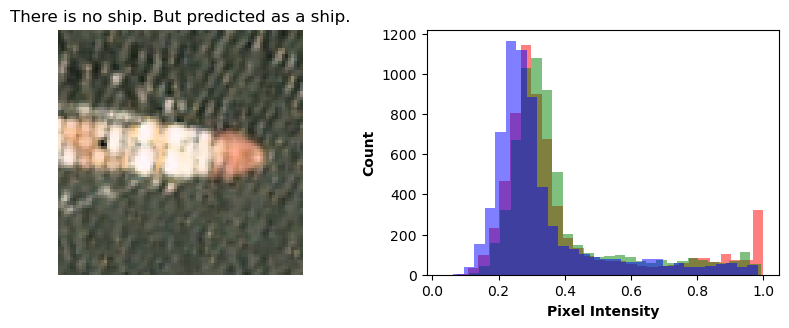

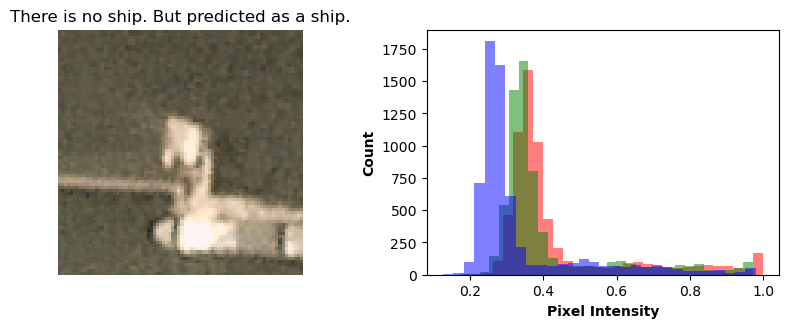

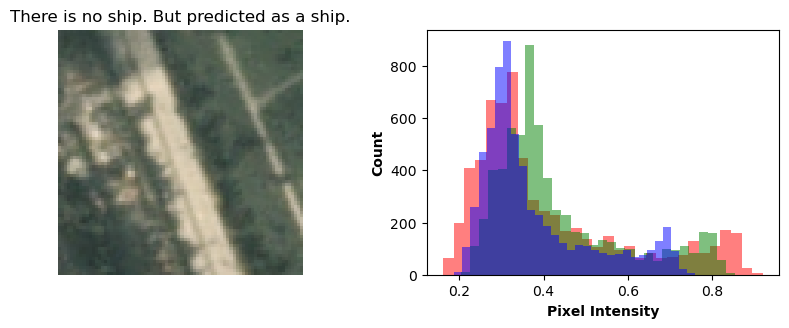

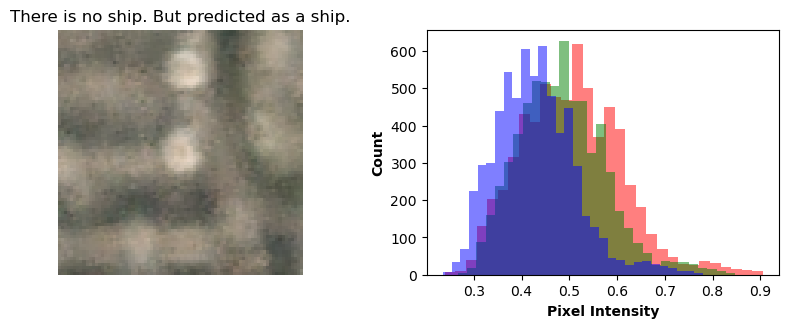

In [50]:
indexes = predicted_data.sort_values('Difference', ascending = False).head(4).index.to_list()

def plotHistogram(image_index):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(x_test[image_index])
    plt.axis('off')
    plt.title('There is no ship. But predicted as a ship.')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(x_test[image_index][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()


#Implementation of the function

for i in indexes:
    plotHistogram(i)


In [51]:
predicted_data.sort_values('Difference', ascending=True).head(10)

,Not A Ship,Ship,There is a Ship,Difference
537,0.999594,0.000406,1.0,-0.999594
578,0.995024,0.004976,1.0,-0.995024
365,0.988120,0.011880,1.0,-0.988120
518,0.956533,0.043467,1.0,-0.956533
322,0.880424,0.119576,1.0,-0.880424
331,0.854495,0.145505,1.0,-0.854495
249,0.853598,0.146402,1.0,-0.853598
100,0.840699,0.159301,1.0,-0.840699
81,0.834512,0.165488,1.0,-0.834512
743,0.801047,0.198953,1.0,-0.801047


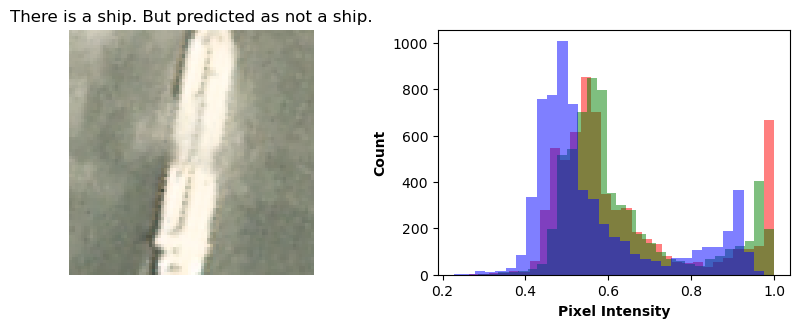

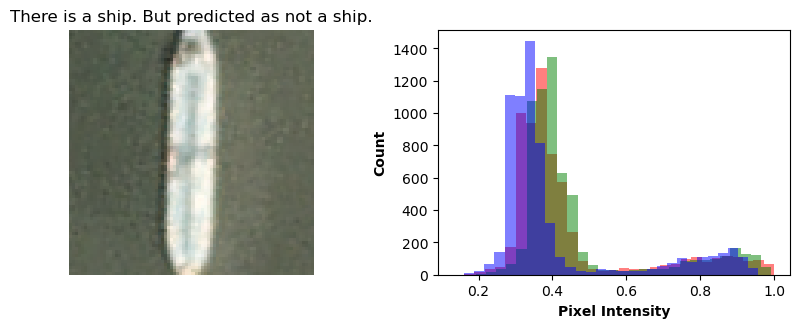

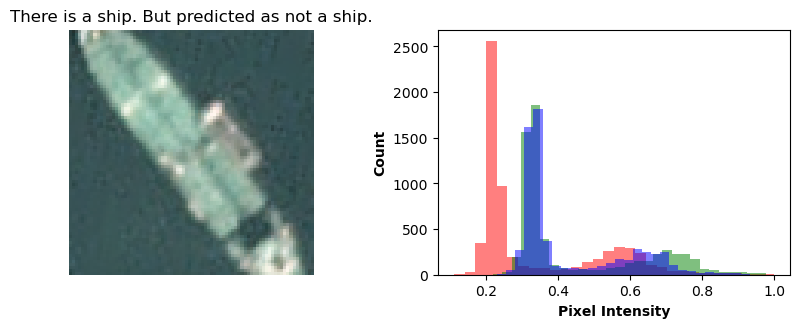

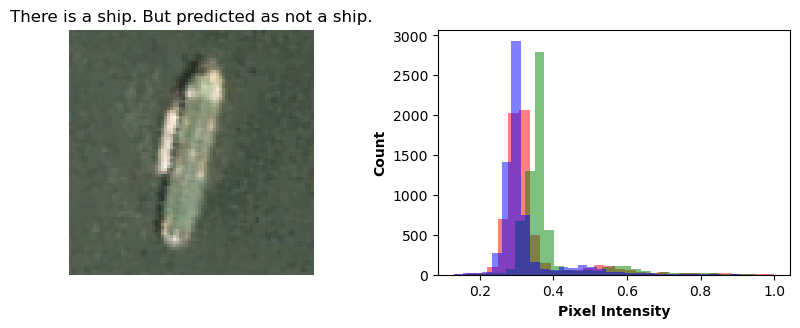

In [52]:
indexes = predicted_data.sort_values('Difference', ascending = True).head(4).index.to_list()

def plotHistogram(image_index):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(x_test[image_index])
    plt.axis('off')
    plt.title('There is a ship. But predicted as not a ship.')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(x_test[image_index][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()

    
#Implementation of the function

for i in indexes:
    plotHistogram(i)

## RFCN

In [53]:
from keras import callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

model = Sequential()
# Convolutional layers
model.add(Conv2D(filters=64, kernel_size=(4, 4), padding='Same', activation='relu', input_shape=(80, 80, 3)))
model.add(MaxPool2D(pool_size=(5, 5)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=(1, 1)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size=(2, 2), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(3, 3), strides=(1, 1)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Correct argument name for learning rate
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True)

# Assuming x_train, y_train, x_val, y_val are already defined
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[earlystopping])






C:\Users\vasan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - accuracy: 0.6835 - loss: 0.6494 - val_accuracy: 0.7513 - val_loss: 0.5529
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.7588 - loss: 0.4979 - val_accuracy: 0.7513 - val_loss: 0.3490
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - accuracy: 0.8139 - loss: 0.3654 - val_accuracy: 0.8913 - val_loss: 0.2834
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.8671 - loss: 0.2946 - val_accuracy: 0.8737 - val_loss: 0.2846
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - accuracy: 0.8792 - loss: 0.2688 - val_accuracy: 0.9125 - val_loss: 0.2196
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.9061 - loss: 0.2258 - val_accuracy: 0.9250 - val_loss: 0.1971
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 121ms/step - accuracy: 0.9136 - loss: 0.2038 - val_accuracy: 0.9350 - val_loss: 0.1688
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.9388 - loss: 0.1708 - val_ac

In [54]:
model.evaluate(x_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9891 - loss: 0.0536


[0.051947351545095444, 0.9887499809265137]

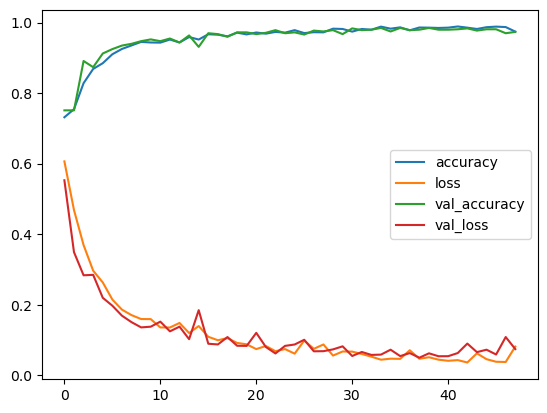

In [55]:
pd.DataFrame(history.history).plot();


In [56]:
model.save('my_saved_model.h5')

In [57]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False, 
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,
        rotation_range=5,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(x_train)

x_train shape: (2400, 80, 80, 3)
x_reshaped shape: (4000, 80, 80, 3)
y shape: (4000,)
Unique labels in y: [0 1]


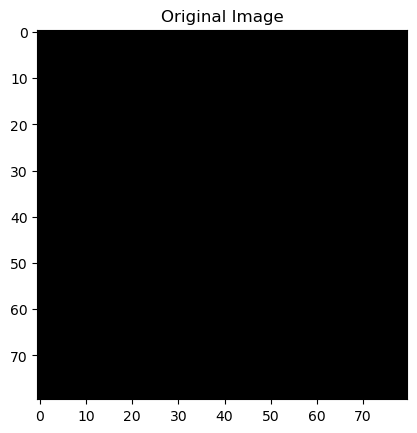

Data Min: 0.3843137254901961
Data Max: 0.9254901960784314
Data Mean: 0.5359895833333334
Normalized Data Min: 0.3843137254901961
Normalized Data Max: 0.9254901960784314
Normalized Data Mean: 0.5359895833333334
Expanded Sample Shape: (1, 80, 80, 3)


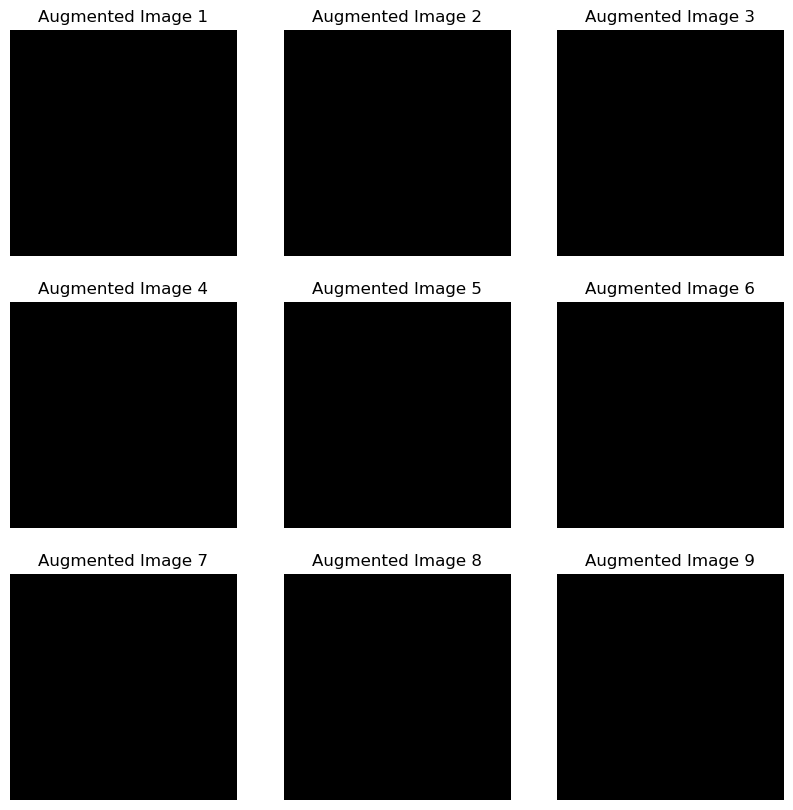

In [58]:


# Ensure x_train, x_reshaped, and y are loaded correctly
print("x_train shape:", x_train.shape)
print("x_reshaped shape:", x_reshaped.shape)
print("y shape:", y.shape)
print("Unique labels in y:", np.unique(y))

# Select a specific sample from x_train
data = x_reshaped[y == 1][15]

# Check the original image data
plt.imshow(data.astype('uint8'))
plt.title("Original Image")
plt.show()

# Print data statistics
print("Data Min:", data.min())
print("Data Max:", data.max())
print("Data Mean:", data.mean())

# Normalize data if necessary
if data.max() > 1:
    data = data / 255.0

# Check normalized data statistics
print("Normalized Data Min:", data.min())
print("Normalized Data Max:", data.max())
print("Normalized Data Mean:", data.mean())

# Expand dimension to one sample
samples = np.expand_dims(data, 0)
print("Expanded Sample Shape:", samples.shape)

# Create image data augmentation generator with simplified parameters
datagen = ImageDataGenerator(
    brightness_range=[0.8, 1.2],
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=5
)

# Fit the data generator on the training data
datagen.fit(x_train)

# Prepare iterator
it = datagen.flow(samples, batch_size=1)

# Generate samples and plot
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    batch = next(it)
    image = batch[0]
    plt.imshow(image.astype('uint8'))
    plt.title(f"Augmented Image {i+1}")
    plt.axis('off')  # Hide axes for better visibility
plt.show()


In [59]:
history = model.fit(datagen.flow(x_train, y_train), epochs = 100, 
                    validation_data=(x_val, y_val), callbacks = [earlystopping])

Epoch 1/100


C:\Users\vasan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


75/75 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.7203 - loss: 1.0453 - val_accuracy: 0.8250 - val_loss: 0.5705
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 201ms/step - accuracy: 0.7547 - loss: 0.5615 - val_accuracy: 0.8913 - val_loss: 0.4497
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - accuracy: 0.7732 - loss: 0.5406 - val_accuracy: 0.8700 - val_loss: 0.4143
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.7769 - loss: 0.5386 - val_accuracy: 0.8637 - val_loss: 0.3857
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 199ms/step - accuracy: 0.7678 - loss: 0.5438 - val_accuracy: 0.8963 - val_loss: 0.3830
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.7810 - loss: 0.5216 - val_accuracy: 0.8863 - val_loss: 0.3755
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - accuracy: 0.7826 - loss: 0.5219 - val_accuracy: 0.7987 - val_loss: 0.3971
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 203ms/step - accuracy: 0.7666 - loss: 0.5419 - val_accuracy

In [60]:
model.evaluate(x_test, y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7952 - loss: 0.5819


[0.5796138048171997, 0.800000011920929]

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step

Test Accuracy Score :  0.8 



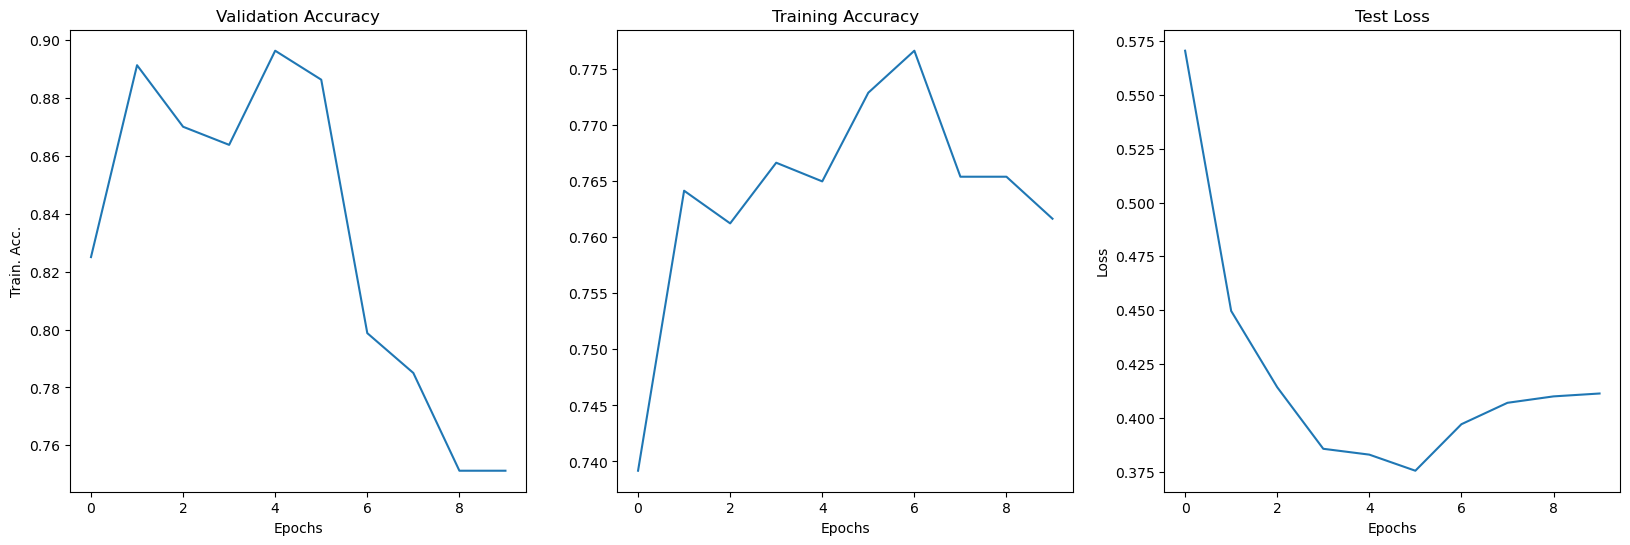

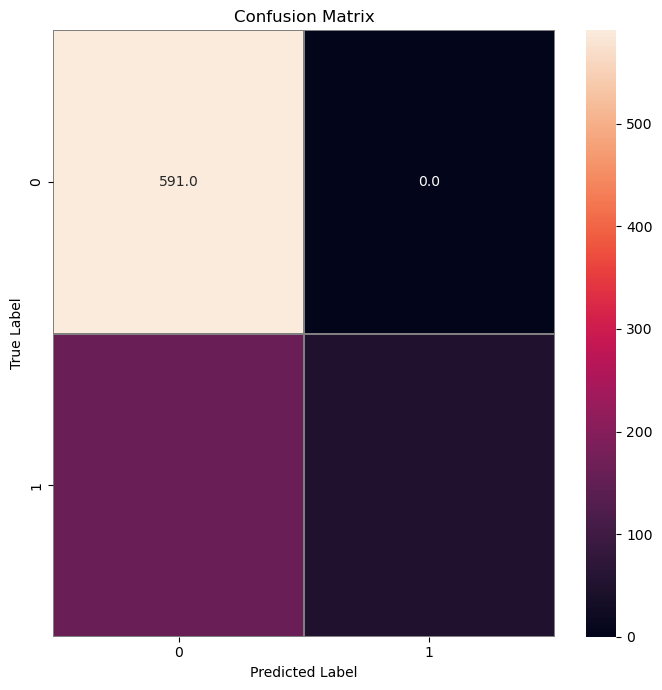

In [61]:
from sklearn import metrics
import seaborn as sns
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# Compute the confusion matrix

print("\n""Test Accuracy Score : ",metrics.accuracy_score(Y_true, Y_pred_classes),"\n")

fig, axis = plt.subplots(1, 3, figsize=(20,6))
axis[0].plot(history.history['val_accuracy'], label='val_acc')
axis[0].set_title("Validation Accuracy")
axis[0].set_xlabel("Epochs")
axis[0].set_ylabel("Val. Acc.")
axis[1].plot(history.history['accuracy'], label='acc')
axis[1].set_title("Training Accuracy")
axis[1].set_xlabel("Epochs")
axis[0].set_ylabel("Train. Acc.")
axis[2].plot(history.history['val_loss'], label='val_loss')
axis[2].set_title("Test Loss")
axis[2].set_xlabel("Epochs")
axis[2].set_ylabel("Loss")

plt.show()


confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Plot the confusion matrix
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.tight_layout()

plt.show()


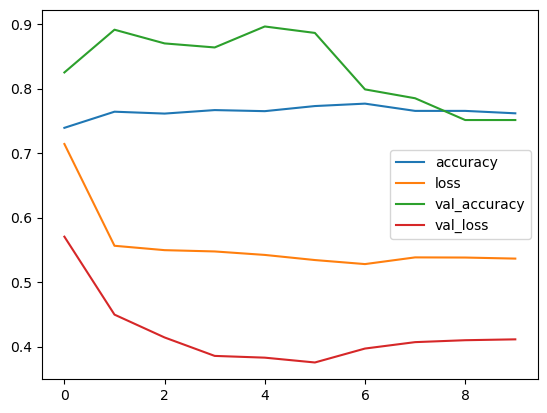

In [62]:
pd.DataFrame(history.history).plot();

In [63]:
prediction = model.predict(x_test)
pd.Series(prediction[0], index=["Not A Ship", "Ship"])

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


Not A Ship    0.454201
Ship          0.545800
dtype: float32

In [64]:
predicted_data = pd.DataFrame(prediction, columns=["Not A Ship", "Ship"])
predicted_data.head(3)

,Not A Ship,Ship
0,0.454201,0.545800
1,0.590297,0.409703
2,0.590144,0.409856


In [65]:
y_test_data = pd.DataFrame(y_test, columns=["Not A Ship", "Ship"])
y_test_data.head(3)

,Not A Ship,Ship
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0


In [66]:
predicted_data['There is a Ship'] = y_test[:, 1]
predicted_data.head()

,Not A Ship,Ship,There is a Ship
0,0.454201,0.545800,1.0
1,0.590297,0.409703,0.0
2,0.590144,0.409856,1.0
3,0.586958,0.413042,0.0
4,0.692183,0.307817,0.0


In [67]:
predicted_data["Difference"] = predicted_data["Ship"] - predicted_data["There is a Ship"]
predicted_data

,Not A Ship,Ship,There is a Ship,Difference
0,0.454201,0.545800,1.0,-0.454200
1,0.590297,0.409703,0.0,0.409703
2,0.590144,0.409856,1.0,-0.590144
3,0.586958,0.413042,0.0,0.413042
4,0.692183,0.307817,0.0,0.307817
...,...,...,...,...
795,0.592381,0.407619,0.0,0.407619
796,0.589277,0.410723,1.0,-0.589277
797,0.590268,0.409732,0.0,0.409732
798,0.594260,0.405740,0.0,0.405740


In [68]:
predicted_data.sort_values('Difference', ascending=False).head(10)

,Not A Ship,Ship,There is a Ship,Difference
588,0.586229,0.413771,0.0,0.413771
3,0.586958,0.413042,0.0,0.413042
747,0.587854,0.412146,0.0,0.412146
628,0.588155,0.411845,0.0,0.411845
271,0.588515,0.411485,0.0,0.411485
685,0.589064,0.410936,0.0,0.410936
280,0.589120,0.410880,0.0,0.410880
196,0.589207,0.410793,0.0,0.410793
536,0.589280,0.410720,0.0,0.410720
313,0.589299,0.410700,0.0,0.410700


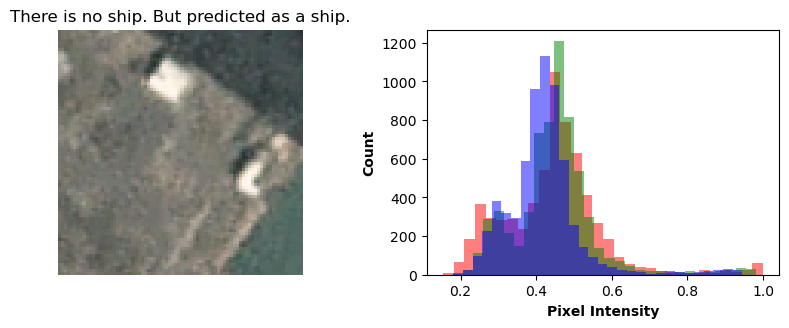

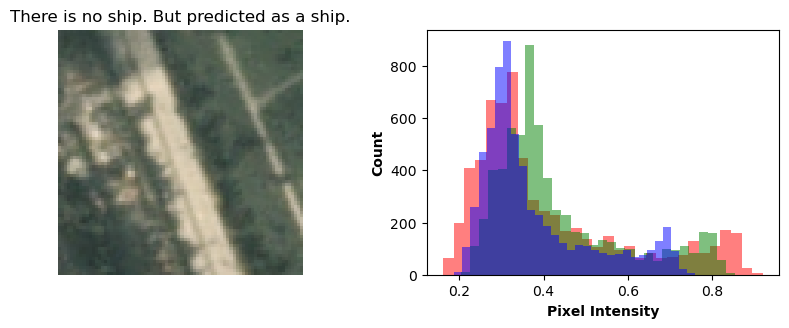

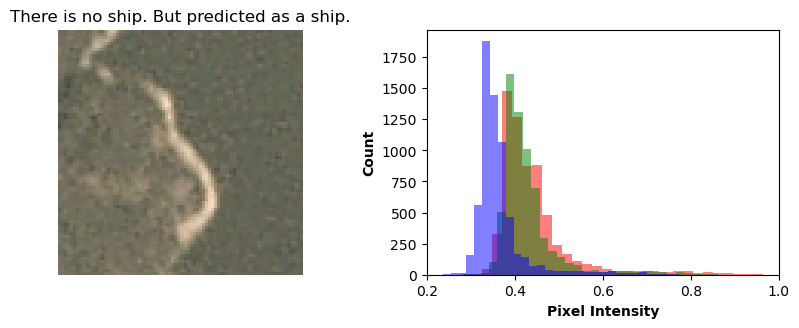

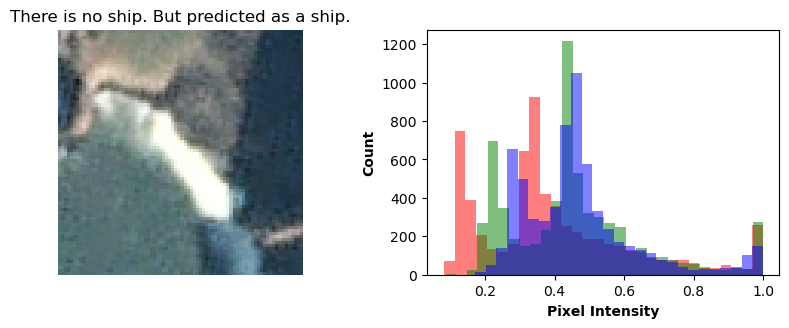

In [69]:
indexes = predicted_data.sort_values('Difference', ascending = False).head(4).index.to_list()

def plotHistogram(image_index):

    plt.figure(figsize = (10,7))
    plt.subplot(2,2,1)
    plt.imshow(x_test[image_index])
    plt.axis('off')
    plt.title('There is no ship. But predicted as a ship.')
    histo = plt.subplot(2,2,2)
    histo.set_ylabel('Count', fontweight = "bold")
    histo.set_xlabel('Pixel Intensity', fontweight = "bold")
    n_bins = 30
    plt.hist(x_test[image_index][:,:,0].flatten(), bins = n_bins, lw = 0, color = 'r', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,1].flatten(), bins = n_bins, lw = 0, color = 'g', alpha = 0.5);
    plt.hist(x_test[image_index][:,:,2].flatten(), bins = n_bins, lw = 0, color = 'b', alpha = 0.5);
    plt.show()


for i in indexes:
    plotHistogram(i)

In [70]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 80, 80, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 16)     │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 200)            │       461,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,560,050 (5.95 MB)

 Trainable params: 520,016 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,040,034 (3.97 MB)

In [72]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation accuracy: {accuracy}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8328 - loss: 0.5666
Validation accuracy: 0.824999988079071


In [76]:
pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 991.0 kB/s eta 0:00:40
   ---------------------------------------- 0.3/38.8 MB 3.2 MB/s eta 0:00:13
   ---------------------------------------- 0.4/38.8 MB 3.9 MB/s eta 0:00:10
    --------------------------------------- 0.5/38.8 MB 3.1 MB/s eta 0:00:13
    --------------------------------------- 0.8/38.8 MB 3.8 MB/s eta 0:00:11
   - -------------------------------------- 1.4/38.8 MB 5.1 MB/s eta 0:00:08
   - -------------------------------------- 1.9/38.8 MB 6.1 MB/s eta 0:00:07
   -- ------------------------------------- 2.2/38.8 MB 6.2 MB/s eta 0:00:06
   -- ------------------------------------- 2.7/38.8 MB 6.9 MB/s eta 0:00:06
   -- ------------------------------------- 2.7/38.8 MB 6.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.7/38.8 MB 6.6 MB/s eta 0:00:06
   -- ------------------------------------- 2.9/38.8 MB 5.3 MB/s eta 0:00:07
   -

In [78]:
import cv2
import numpy as np

# Load the pre-trained model
model = tf.keras.models.load_model('my_saved_model.h5')

# Load the image
image = cv2.imread('Baniyas_27-July-2021_WV2_single-ship.jpg')

# Preprocess the image
image = cv2.resize(image, (80, 80))
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(image)

# Interpret the prediction (assuming index 1 is "ship")
ship_probability = prediction[0][1]

if ship_probability > 0.5:
  print("The image likely contains a ship with a probability of", ship_probability)
else:
  print("The image likely does not contain a ship with a probability of", 1 - ship_probability)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
The image likely does not contain a ship with a probability of 1.0


In [83]:
import sys
print(sys.version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
